<a href="https://colab.research.google.com/github/Zillth/perceptron/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron
> A perceptron is a type of artificial neural network architecture that was originally proposed in the 1950s by Frank Rosenblatt. It is a simple, single-layer neural network that can be used for supervised learning tasks, such as classification and regression.

> The perceptron receives inputs, which are then multiplied by weights and summed up to produce an output. The output is then passed through an activation function, which maps the output to a binary value (0 or 1) or a continuous value between 0 and 1.

> During training, the perceptron adjusts its weights based on the errors in the predicted output compared to the actual output. This process is repeated many times until the perceptron can accurately classify or predict the output.

> One limitation of the perceptron is that it can only classify linearly separable data, which means that it cannot handle datasets that are not linearly separable. However, it is still a useful and widely-used neural network architecture due to its simplicity and effectiveness in many classification tasks.

Ingrese el vector que desea comparar separado por comas.
1,0.5,1
El vector ingresado pertenece a: Clase 1


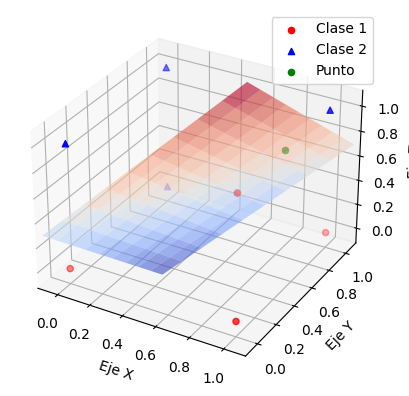

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from matplotlib import cm

class1 = np.array([[0, 0, 0], [1, 0, 0], [1, 0, 1], [1, 1, 0]])
class2 = np.array([[1, 1, 1], [0, 1, 0], [0, 1, 1], [0, 0, 1]])

# Concatenar las dos clases en una sola matriz
X = np.concatenate([class1, class2])
# Definir las etiquetas de clase (0 para class1, 1 para class2)
y = np.array([0] * len(class1) + [1] * len(class2))

# Crear el modelo del perceptrón
clf = Perceptron()

# Entrenar el modelo con los datos
clf.fit(X, y)

# Crear una malla de puntos para graficar la superficie de decisión
xx, yy = np.meshgrid(np.linspace(-0.1, 1.1, 10), np.linspace(-0.1, 1.1, 10))
coef = np.squeeze(clf.coef_)
zz = -(coef[0] * xx + coef[1] * yy + clf.intercept_) / coef[2]

# Crear diccionario para identificar clases
classes = {
    0: 'Clase 1',
    1: 'Clase 2'
}

while True:
    user_input = []
    while len(user_input) != len(X[0]):
        user_input = input('Ingrese el vector que desea comparar separado por comas.\n').split(',')
        user_input = [float(x) for x in user_input]
    
    pred = int(clf.predict([user_input]))  
    print('El vector ingresado pertenece a: {}'.format(classes.get(pred)))

    # Crear la figura en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Graficar los puntos de la clase 1 en rojo
    ax.scatter(class1[:, 0], class1[:, 1], class1[:, 2], c='r', marker='o', label='Clase 1')

    # Graficar los puntos de la clase 2 en azul
    ax.scatter(class2[:, 0], class2[:, 1], class2[:, 2], c='b', marker='^', label='Clase 2')

    # Graficar el punto que ingreso el usuario
    ax.scatter(user_input[0], user_input[1], user_input[2], c='g', marker='o', label='Punto')

    # Graficar la superficie de decisión
    ax.plot_surface(xx, yy, zz, alpha=0.6, cmap=cm.coolwarm)

    # Configurar los límites de los ejes
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_zlim(-0.1, 1.1)

    # Mostrar la figura
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje Z')
    plt.legend()
    plt.show()
    
    if input('Deseas clasificar un punto diferente? y/n\n') != 'y':
        break
